In [1]:
%matplotlib notebook

from IPython.display import Image
from simplify.face_lattice import *
from simplify.simplify import *
from simplify.plot import *
from simplify.homothety import *
from islpy import *
from IPython.display import Image
import networkx as nx
import graphviz as gv

In [2]:
# 2D simplest motivating example

op = 'max'
fp = '[N]->{[i,j]->[i]}'
fd = '[N]->{[i,j]->[j]}'
s = '[N]->{[i,j] : 0<=j and i-N<=j and j<=i and j<=3N/2 }'

k = len(fd.split('-')[-2].split(',')) - len(fd.split('-')[-1].split(','))
successes = start(op, fp, s, fd, k)

constraints:
c0	[[ 0  1  0  0]	[N] -> { [i, j] : j >= 0 }
c1	 [-1  1  1  0]	[N] -> { [i, j] : N - i + j >= 0 }
c2	 [ 1 -1  0  0]	[N] -> { [i, j] : i - j >= 0 }
c3	 [ 0 -2  3  0]]	[N] -> { [i, j] : 3N - 2j >= 0 }

---
@{} STEP A.1 - if k==0 return else continue. k=1
@{} 
@{} node = {}
@{} fp = [N]->{[i,j]->[i]}
@{} fd = [N]->{[i,j]->[j]}
@{} 
@{} STEP A.2 - identify boundaries given fp
@{} 
@{} {3} BoundaryLabel.NON_BOUNDARY
@{} {2} BoundaryLabel.NON_BOUNDARY
@{} {1} BoundaryLabel.NON_BOUNDARY
@{} {0} BoundaryLabel.NON_BOUNDARY
@{} 
@{} STEP A.3 - construct list of candidate facets (i.e., non-boundary facets)
@{} 
@{} candidate_facets = [{3}, {2}, {1}, {0}]
@{} 
@{} STEP A.4 - determine all possible combos
@{} 
@{} ['{3}', '{2}', '{1}', '{0}']
@{} ----------------------------
@{} ['ADD', 'ADD', 'ADD', 'ADD']  impossible
@{} ['ADD', 'ADD', 'ADD', 'INV']  impossible
@{} ['ADD', 'ADD', 'INV', 'ADD']  impossible
@{} ['ADD', 'ADD', 'INV', 'INV']  impossible
@{} ['ADD', 'INV', 'ADD', 'ADD']  

@{}:@{} 
@{}:@{0} STEP A.1 - if k==0 return else continue. k=0
@{}:@{0} 
@{}:@{0} SUCCESS
@{}:@{} 
@{}:@{} 
@{}:@{} STEP C - reduction decomposition
@{}:@{} 
@{}:@{} STEP C.1 - is decomposition feasible?
@{}:@{} 
@{}:@{} decomposition not feasible for fp = [N]->{[i,j]->[i]}
@{}:@{} 
@{}:@{} STEP A.1 - if k==0 return else continue. k=1
@{}:@{} 
@{}:@{} node = {}
@{}:@{} fp = [N]->{[i,j]->[i]}
@{}:@{} fd = [N]->{[i,j]->[j]}
@{}:@{} 
@{}:@{} STEP A.2 - identify boundaries given fp
@{}:@{} 
@{}:@{} {2} BoundaryLabel.NON_BOUNDARY
@{}:@{} {1} BoundaryLabel.STRICT_BOUNDARY
@{}:@{} {0} BoundaryLabel.NON_BOUNDARY
@{}:@{} 
@{}:@{} STEP A.3 - construct list of candidate facets (i.e., non-boundary facets)
@{}:@{} 
@{}:@{} candidate_facets = [{2}, {0}]
@{}:@{} 
@{}:@{} STEP A.4 - determine all possible combos
@{}:@{} 
@{}:@{} ['{2}', '{0}']
@{}:@{} --------------
@{}:@{} ['ADD', 'ADD']  impossible
@{}:@{} ['ADD', 'INV']  possible -> rho = [N = 0] -> { [-1, 0] }
@{}:@{} ['INV', 'ADD']  impossible
@{

<IPython.core.display.Javascript object>


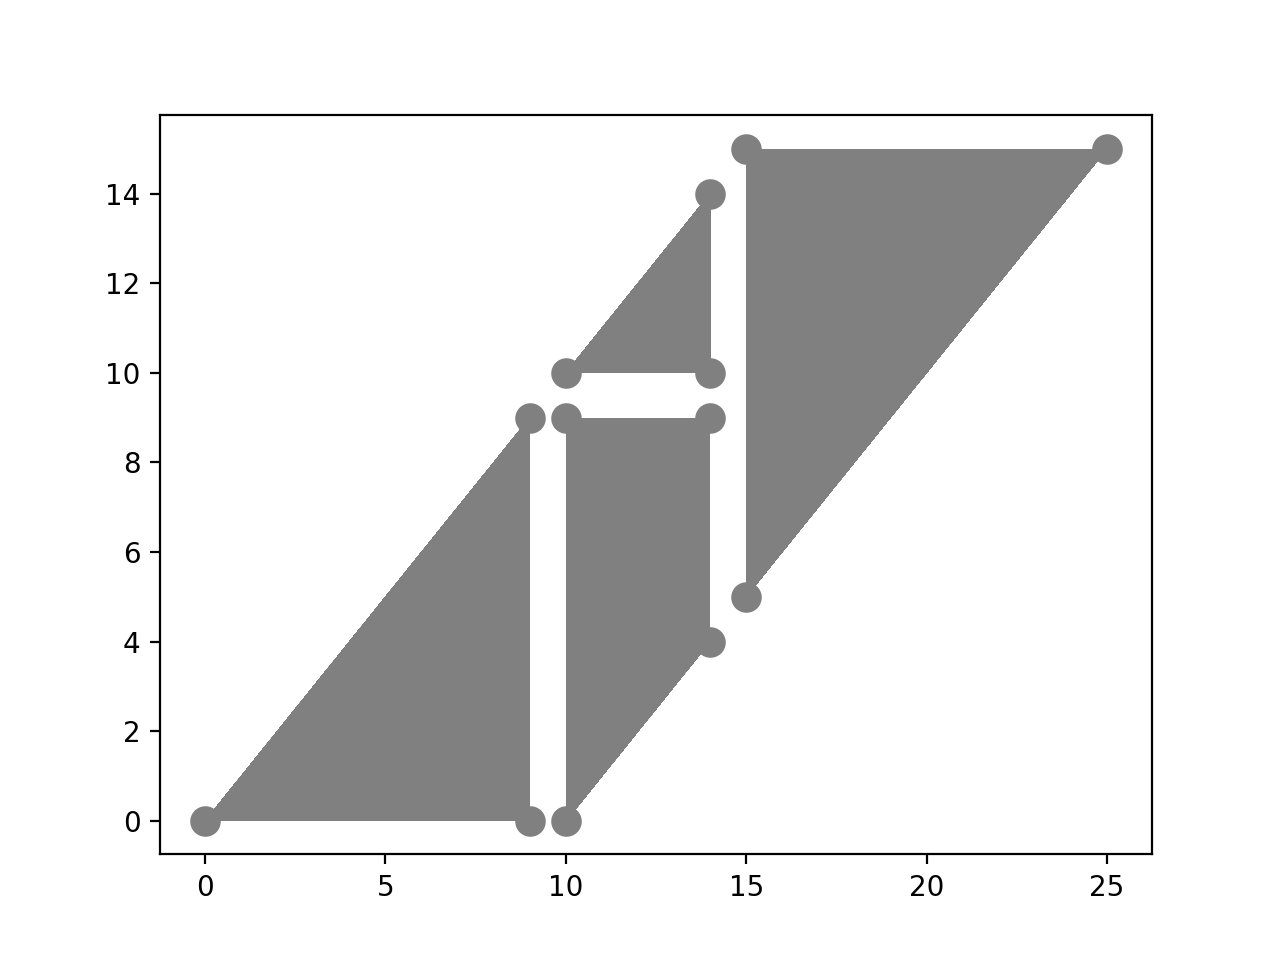

In [3]:
dom = BasicSet('[N]-> {[i,j] : 0<=i,j<=100 and N=10}')

for success in successes:
    for P in success.get_splits():
        plot_bset_shape(P.intersect(dom))

In [4]:
# 3D parallelpiped

op = 'max'
fp = '[N,M]->{[i,j,k]->[i,j]}'
fd = '[N,M]->{[i,j,k]->[k]}'
s = '[N,M]->{[i,j,k] : k<=i,j<=N+k and 0<=k<=M}'

k = len(fd.split('-')[-2].split(',')) - len(fd.split('-')[-1].split(','))
successes = start(op, fp, s, fd, k)

constraints:
c0	[[ 0  0  1  0  0  0]	[N, M] -> { [i, j, k] : k >= 0 }
c1	 [-1  0  1  1  0  0]	[N, M] -> { [i, j, k] : N - i + k >= 0 }
c2	 [ 0 -1  1  1  0  0]	[N, M] -> { [i, j, k] : N - j + k >= 0 }
c3	 [ 0  1 -1  0  0  0]	[N, M] -> { [i, j, k] : j - k >= 0 }
c4	 [ 1  0 -1  0  0  0]	[N, M] -> { [i, j, k] : i - k >= 0 }
c5	 [ 0  0 -1  0  1  0]]	[N, M] -> { [i, j, k] : M - k >= 0 }

---
@{} STEP A.1 - if k==0 return else continue. k=2
@{} 
@{} node = {}
@{} fp = [N,M]->{[i,j,k]->[i,j]}
@{} fd = [N,M]->{[i,j,k]->[k]}
@{} 
@{} STEP A.2 - identify boundaries given fp
@{} 
@{} {5} BoundaryLabel.NON_BOUNDARY
@{} {4} BoundaryLabel.NON_BOUNDARY
@{} {3} BoundaryLabel.NON_BOUNDARY
@{} {2} BoundaryLabel.NON_BOUNDARY
@{} {1} BoundaryLabel.NON_BOUNDARY
@{} {0} BoundaryLabel.NON_BOUNDARY
@{} 
@{} STEP A.3 - construct list of candidate facets (i.e., non-boundary facets)
@{} 
@{} candidate_facets = [{5}, {4}, {3}, {2}, {1}, {0}]
@{} 
@{} STEP A.4 - determine all possible combos
@{} 
@{} ['{5}', '{4}',

@{}:@{4} [] ['INV', 'inward', 'INV', 'outward']  -> rho = [N = 0, M = 0] -> { [-1, 0, 0] }
@{}:@{4} 
@{}:@{4} STEP A.7 - recurse into "ADD" and "inward" boundary facets
@{}:@{4} 
@{}:@{4} recursing into {2, 4} facet
@{}:@{4} 
@{}:@{2, 4} STEP A.1 - if k==0 return else continue. k=0
@{}:@{2, 4} 
@{}:@{2, 4} SUCCESS
@{}:@{4} 
@{}:@{4} 
@{}:@{4} STEP C - reduction decomposition
@{}:@{4} 
@{}:@{4} STEP C.1 - is decomposition feasible?
@{}:@{4} 
@{}:@{4} decomposition not feasible for fp = [N,M]->{[i,j,k]->[i,j]}
@{}:@{4} 
@{}:@{} recursing into {2} facet
@{}:@{} 
@{}:@{2} STEP A.1 - if k==0 return else continue. k=1
@{}:@{2} 
@{}:@{2} node = {2}
@{}:@{2} fp = [N,M]->{[i,j,k]->[i,j]}
@{}:@{2} fd = [N,M]->{[i,j,k]->[k]}
@{}:@{2} 
@{}:@{2} STEP A.2 - identify boundaries given fp
@{}:@{2} 
@{}:@{2} {2, 4} BoundaryLabel.STRICT_BOUNDARY
@{}:@{2} {2, 3} BoundaryLabel.STRICT_BOUNDARY
@{}:@{2} {1, 2} BoundaryLabel.STRICT_BOUNDARY
@{}:@{2} {0, 2} BoundaryLabel.STRICT_BOUNDARY
@{}:@{2} 
@{}:@{2} STEP

@{}:@{2} []  possible -> rho = [N = 0, M = 0] -> { [0, -1, 0] }
@{}:@{2} 
@{}:@{2} STEP A.5 - prune out redundant possible combos
@{}:@{2} 
@{}:@{2} []
@{}:@{2} --
@{}:@{2} []  -> rho = [N = 0, M = 0] -> { [0, -1, 0] }
@{}:@{2} 
@{}:@{2} STEP A.6 - incorporate boundary facets
@{}:@{2} 
@{}:@{2} [] ['{2, 4}', '{2, 3}', '{1, 2}', '{0, 2}']
@{}:@{2} -------------------------------------------
@{}:@{2} [] ['INV', 'inward', 'INV', 'outward']  -> rho = [N = 0, M = 0] -> { [0, -1, 0] }
@{}:@{2} 
@{}:@{2} STEP A.7 - recurse into "ADD" and "inward" boundary facets
@{}:@{2} 
@{}:@{2} recursing into {2, 3} facet
@{}:@{2} 
@{}:@{2, 3} STEP A.1 - if k==0 return else continue. k=0
@{}:@{2, 3} 
@{}:@{2, 3} SUCCESS
@{}:@{2} 
@{}:@{2} 
@{}:@{2} STEP C - reduction decomposition
@{}:@{2} 
@{}:@{2} STEP C.1 - is decomposition feasible?
@{}:@{2} 
@{}:@{2} decomposition not feasible for fp = [N,M]->{[i,j,k]->[i,j]}
@{}:@{2} 
@{}:@{} 
@{}:@{} recursing into {3} facet
@{}:@{} 
@{}:@{3} STEP A.1 - if k==0 retu

<IPython.core.display.Javascript object>


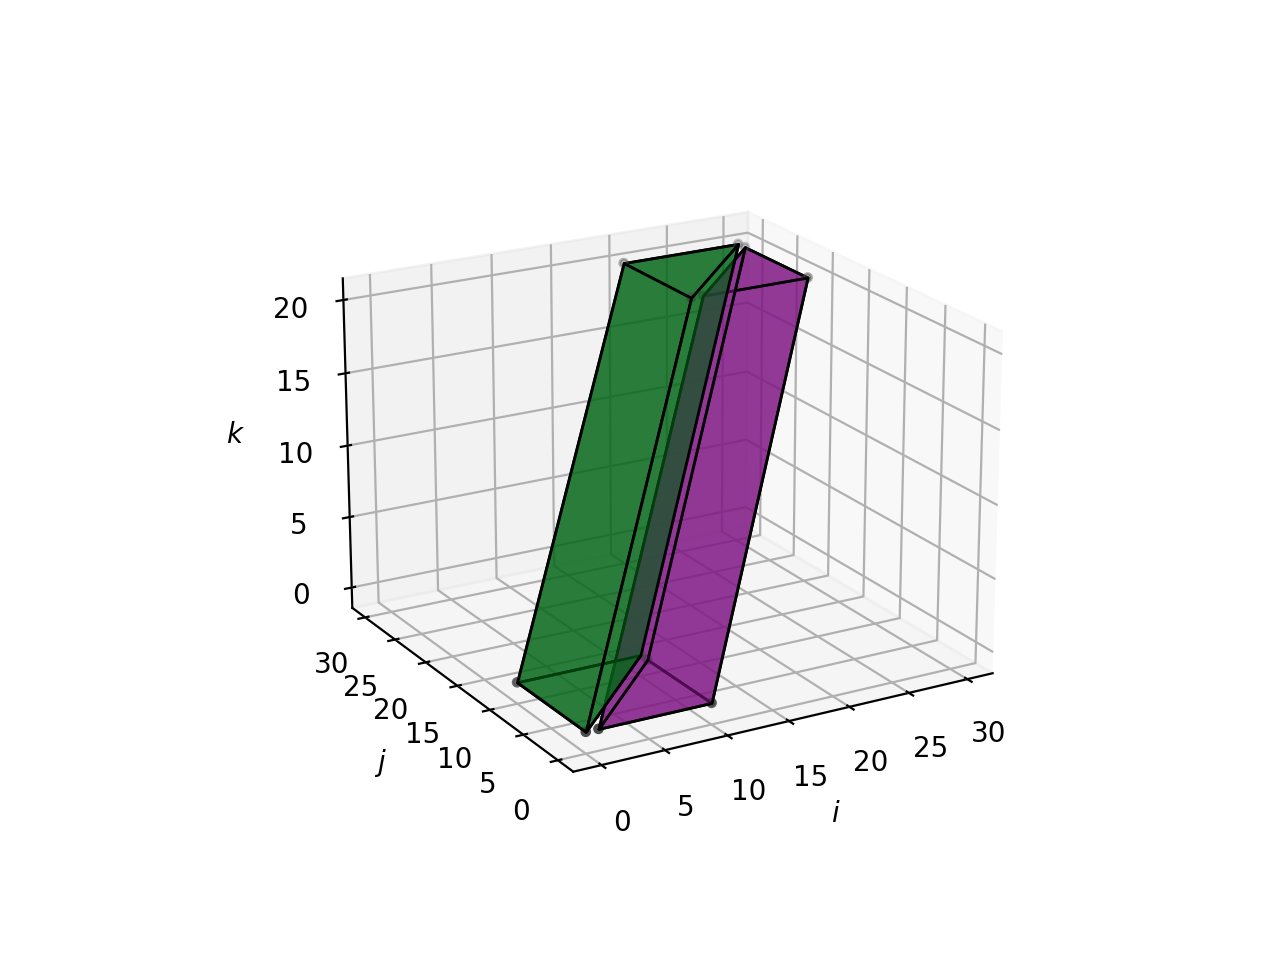

In [5]:
dom = BasicSet('[N,M]-> {[i,j,k] : 0<=i,j,k<=100 and N=10 and M=20}')

for success in successes:
    P = success.get_splits(result=set())
    plot_3d_sets([p.intersect(dom) for p in P])